## Classes

In [82]:
class Employee:
    'Common base class for all employees'  # doc, returned by: help(Employee)
    empCount = 0                           # class attributes
    def __init__(self, name):              # called when object is created 
        self.name = name                   # attributes set on new object
        Employee.empCount += 1             # class attribute updated
    def __str__(self):                     # called by str function (and by e.g. print function)
        return f"Name: {self.name}"

emp1 = Employee("Zara")
print(emp1)
str(emp1)

Name: Zara


'Name: Zara'

In [90]:
class WageEmployee(Employee):         # define derived class
    def __init__(self, name, rate):
        super().__init__(name)
        self.rate = rate
        self.hours = 0
    def worked(self, hours): 
        self.hours += hours
    def pay_slip(self): 
        return "{}: wage {}".format(self.name, self.hours*self.rate)
    def __str__(self): 
        return self.pay_slip()
joe = WageEmployee('Joe', 20)
joe.worked(120)
print(joe)

Joe: wage 2400


In [95]:
def no_dunders(obj):
    return list(filter( lambda x: not x.startswith('__'), dir(obj)))
nodunders(WageEmployee)

['empCount', 'pay_slip', 'worked']

In [96]:
nodunders(joe)

['empCount', 'hours', 'name', 'pay_slip', 'rate', 'worked']

In [99]:
joe.__dict__

{'name': 'Joe', 'rate': 20, 'hours': 120}

In [101]:
joe.other = 'Other'
joe.other, joe.__dict__

('Other', {'name': 'Joe', 'rate': 20, 'hours': 120, 'other': 'Other'})

In [102]:
hasattr(joe, 'other'), setattr(joe, 'other', 'same'), getattr(joe, 'other'), delattr(joe, 'other') 
# joe.other

(True, None, 'same', None)

In [116]:
class A(object):
    def __init__(self):        
        print("Constructor A was called")
    
class B(A):    
    def __init__(self):        
        super().__init__()        
        print("Constructor B was called")

class C(B):    
    def __init__(self):        
        super().__init__()
        print("Constructor C was called")
C()

Constructor A was called
Constructor B was called
Constructor C was called


Use `super(cls, inst)` to get inst back disguished as if its type is the super class (the base of) `cls`

In [115]:
class C:
    def foo(self):
        print('foo C', self)
class B(C):
    def foo(self):
        print('foo B', self)  

class A(B):
    def foo(self):
        super().foo()
    def baz(self): 
        print('in baz ...')
        super().foo()  # same as super(A,self)
        super(A,self).foo()
        C.foo(self) 
        super(B, self).foo()

a = A()
b = B()
c = C()
a.foo()
b.foo()
c.foo()

a.baz()

foo B <__main__.A object at 0x000001D4CD43B5C8>
foo B <__main__.B object at 0x000001D4CD43BD48>
foo C <__main__.C object at 0x000001D4CD67E208>
in baz ...
foo B <__main__.A object at 0x000001D4CD43B5C8>
foo B <__main__.A object at 0x000001D4CD43B5C8>
foo C <__main__.A object at 0x000001D4CD43B5C8>
foo C <__main__.A object at 0x000001D4CD43B5C8>


### MRO - Method Resolution Order
Order in which base classes will be searched, stored under __mro__ on each class object, determined when class is defined. Fails if no order can be found that is a) monotonic (a subclass does not force different order than its ancestors) and b) reflects the order in which bases where listed in the definitions of its ancestors. 

In [117]:
class A(object):
    pass
    
class B(A):    
    pass

class C(A,B):    
    pass
# fails to find unambiguous MRO; switch order to B,A to solve

TypeError: Cannot create a consistent method resolution
order (MRO) for bases A, B

In [120]:
class Point:
    def __init__( self, x=0, y=0):
        self.x = x
        self.y = y
    def __del__(self):
        class_name = self.__class__.__name__
        print(class_name, "destroyed")
pt1 = Point()
pt2 = pt1
pt3 = pt1    # ref count == 3
print(id(pt1), id(pt2), id(pt3)) # prints id’s of objects
del pt1                         # pt1 no longer bound to point, but point still there (ref count == 2)
print ("after del pt1")
del pt2
print ("after del pt2")
del pt3
print ("after del pt3")

2013487439816 2013487439816 2013487439816
after del pt1
after del pt2
Point destroyed
after del pt3


In [122]:
class Account :
    interestRate = 10
    def getInterestRate1():
        return Account.interestRate
    getInterestRate1 = staticmethod(getInterestRate1)
    @staticmethod
    def getInterestRate2():
        return Account.interestRate

print (Account.getInterestRate1())
print (Account.getInterestRate2())
a = Account()
a.getInterestRate1()

10
10


10

In [128]:
class Bank:
    @classmethod
    def is_valid(cls, key): # code for determining validity here
        'some test specific for Bank class'
        return not len(key) % 2
    def add_key(self, key, val):
        if not Bank.is_valid(key):
            raise ValueError()
# Use method without instance, signals code closely-associated with Bank
Bank.is_valid('ok key'), Bank.is_valid('wrong key')
# b = Bank()
# b.is_valid('ok key')

True

### Types of classes: the metaclass
Just like every other object in Python, classes have a type. And just like always, their type determines what operations they support and in what way: the type of a class determines how it is created, how it in turn creates its instances and so on. 

In [2]:
type(5), type(int), type(type) 

(int, type, type)

In [3]:
class Foo: pass
f = Foo()
type(f), type(Foo)

(__main__.Foo, type)

In [7]:
class Foo:
    a = 0
    def __init__(self, name):
        self.name = name
    def baz(self):
        return "baz"
Foo.__dict__

mappingproxy({'__module__': '__main__',
              'a': 0,
              '__init__': <function __main__.Foo.__init__(self, name)>,
              'baz': <function __main__.Foo.baz(self)>,
              '__dict__': <attribute '__dict__' of 'Foo' objects>,
              '__weakref__': <attribute '__weakref__' of 'Foo' objects>,
              '__doc__': None})

In [11]:
Foo.mro(), type(object), type(Foo)

([__main__.Foo, object], type, type)

`Foo` is a class with `object` as its sole (default) base. The type of `object` is `type`, so this is inherited by Foo.
Just like a `Foo` object is created by calling `Foo()`, a new class of type `type` is created by calling `type(<args>)`

In [14]:
def init_Foo2(self, name):
    self.name = name
type("Foo2",                                                     # name
     (),                                                         # tuple of bases
     {"a":0, "__init__": init_Foo2, "baz": lambda self: "baz"})  # mapping of attributes


__main__.Foo2

In [15]:
Foo2

NameError: name 'Foo2' is not defined

In [18]:
# the class statement also adds the class name to the namespace in which it was called
# using type we have to arrange for that ourselves 
Foo2 = type("Foo2",                                                     # name
            (),                                                         # tuple of bases
            {"a":0, "__init__": init_Foo2, "baz": lambda self: "baz"})  # mapping of attributes

Foo2("Joe")

In [19]:
# by specializing type we can create our own metaclasses 
class MyType(type):
      pass
class MyClass(metaclass=MyType):
      pass
type(MyClass)

__main__.MyType

### Instance and class creation: what happens?

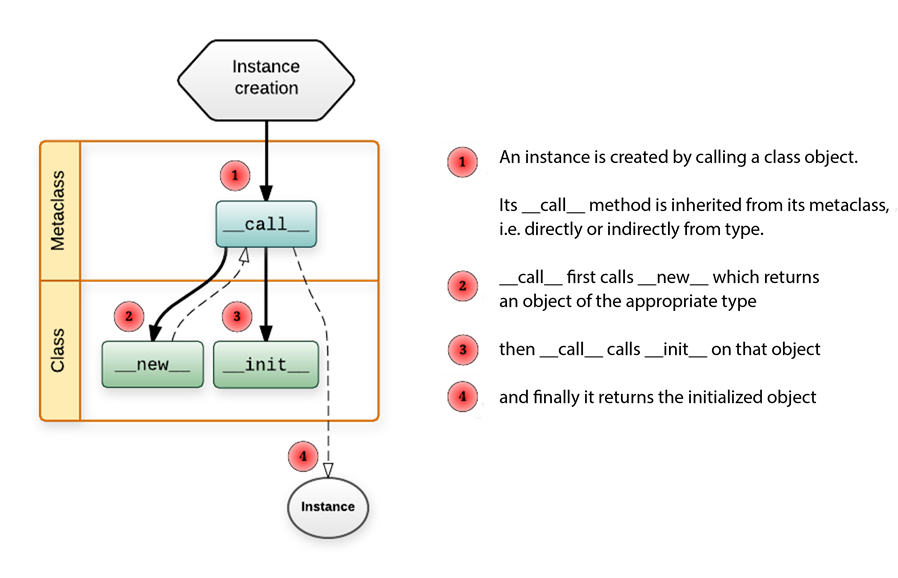

Knowing about instance creation, we could create a Singleton class that overrides the __new__ method inherited from `object`: 

In [24]:
class Singleton:
    _instance = None 
    def __new__(cls, *args, **kwargs): 
        if not cls._instance: 
            cls._instance = object.__new__(cls, *args, **kwargs)
        return cls._instance 
class Foo(Singleton): 
    pass 
Foo() is Foo()

True

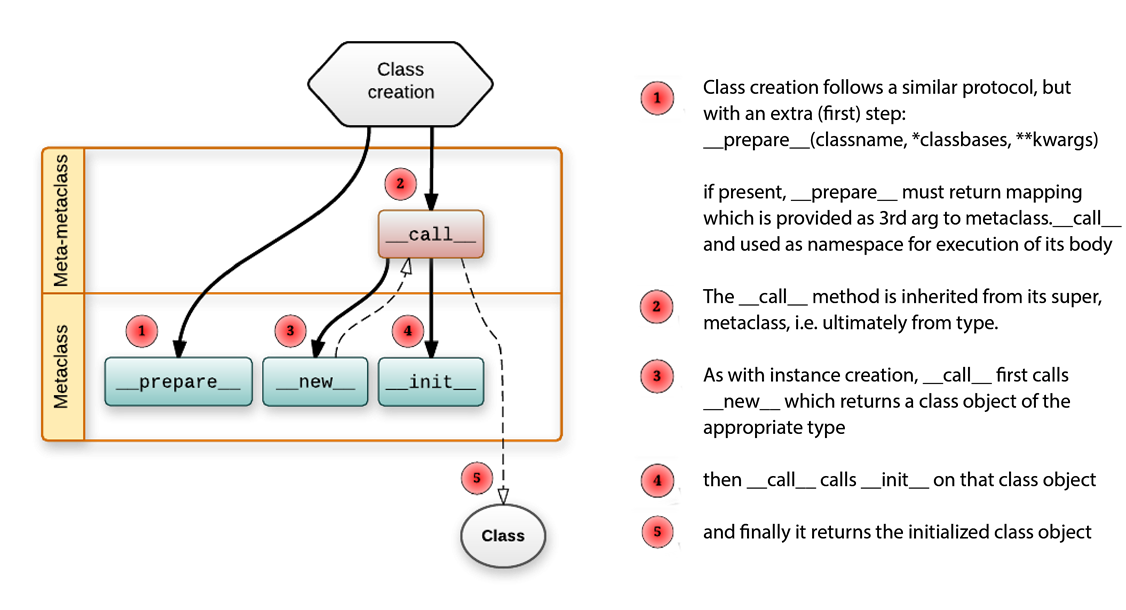

In [23]:
# Creating a new metaclass for singletons by overriding the regular __call__

class Singleton(type):
    instance = None
    def __call__(cls, *args, **kwargs):
        if not cls.instance:
            cls.instance = super(Singleton, cls).__call__(*args, **kwargs)
            # or just: cls.instance = super().__call__(*args, **kwargs)
        return cls.instance
class ASingleton(metaclass=Singleton):
    pass
ASingleton() is ASingleton()

True

### __slots__

In [26]:
class C:
    __slots__ = ('a', 'b')
c = C()
hasattr(c,'__dict__')

False

- objects will not get` __dict__`, saves memory (values are simply stored in list on object)
- can only assign values to these slots
- uses descriptor protocol to handle getting and setting
- setting the slot attributes on class destroys the descriptor, so that value becomes value for all objects


In [33]:
c2 = C()
c2.a = 23; c2.b = 24; c.a = 3; c.b  = 4
print(c2.a, c2.b, c.a, c.b)
C.a = None
print(c2.a, c2.b, c.a, c.b)

23 24 3 4
None 24 None 4


Let's see if we can emulate how slots might work using what we know about descriptors (see [Attributes](Attributes.ipynb) notebook) and metaclasses.

In [31]:
'Rough approximation of how slots work'

class Member(object):
    'Descriptor implementing slot lookup'
    def __init__(self, i):
        self.i = i
    def __get__(self, obj, type=None):
        return obj._slotvalues[self.i]
    def __set__(self, obj, value):
        obj._slotvalues[self.i] = value

class Type(type):
    'Metaclass that detects and implements _slots_'
    def __new__(self, name, bases, namespace):
        slots = namespace.get('_slots_')
        if slots:
            for i, slot in enumerate(slots):
                namespace[slot] = Member(i)
            original_init = namespace.get('__init__')                
            def __init__(self, *args, **kwds):
                'Create _slotvalues list and call the original __init__'                
                self._slotvalues = [None] * len(slots)
                if original_init is not None:
                    original_init(self, *args, **kwds)
            namespace['__init__'] = __init__
        return type.__new__(self, name, bases, namespace)

class Object(metaclass=Type):
    #__metaclass__ = Type
    pass

class A(Object):
    _slots_ = 'x', 'y'

a = A()
a.x = 10
print (a.x, a.y)

10 None


## Abstract classes
Abstract Base Classes: (ABC's) are classes that can be added into inheritance tree to signal certain features to an external inspector. Subclasses can be registered to a class without having to adapt the actual class hierarchy.

In [38]:
# ABCMeta is the metaclass that provides the proper support for ABC's
# This is what the definition of ABCMeta looks like:
class ABCMeta(type): 
    def __instancecheck__(cls, inst): 
        return any(cls.__subclasscheck__(c) for c in {type(inst), inst.__class__}) 
    def __subclasscheck__(cls, sub): 
        candidates = cls.__dict__.get("__subclass__", set()) | {cls} 
        return any(c in candidates for c in sub.mro()) 

# This is how you would use it:
class Sequence(metaclass=ABCMeta): 
    __subclass__ = {list, tuple}

issubclass(tuple, Sequence), isinstance((), Sequence) 

(True, True)

Simplest way to use ABC's is to specialize `ABC` (an empty `class` of metaclass `ABCMeta`) and register subclasses on your class: 

In [40]:
from abc import ABC
class Sequence(ABC): pass
Sequence.register(tuple)

issubclass(tuple, Sequence), isinstance((), Sequence) 

(True, True)

### Abstract methods
ABCMeta also supports a new type of method: `abstractmethod`.
A class with abstract methods cannot be instantiated as long as these have not been overriden with a proper method.
- `abstractmethod` can also be used as decorator
- it is possible (and useful) to mix regular and abstract methods
- it is even possible to override regular method with abstract method!

In [43]:
from abc import ABC, abstractmethod

class Vehicle(ABC):
    @abstractmethod
    def number_of_wheels(self):
        pass

class Car(Vehicle):
    def number_of_wheels(self):
        return 4
    
c = Car() 

# Try to create a Vehicle: FAILS
v = Vehicle()

TypeError: Can't instantiate abstract class Vehicle with abstract methods number_of_wheels

In [45]:
class UnusualCar(Car):
    @abstractmethod
    def number_of_wheels(self):
        pass
    
c = Car()

# a subclass of (non-abstract) Car can be made abstract abstract 
UnusualCar()

TypeError: Can't instantiate abstract class UnusualCar with abstract methods number_of_wheels

#### collections.abc

A module providing types for various containers, for example, `collections.abc.Iterator`.

`Iterator` provides default implementation for `__iter__` and forces you to implement `__next__`.

In [112]:
from collections.abc import Iterator
from random import random
from math import ceil

class Die(Iterator):   # gets __iter__, still needs __next__
    def __next__(self):
        return ceil(random() * 6)
    def throw(self, n, stop=150):
        assert 0 < n < 7, '1 to 6 please'
        for i in range(stop):
            d = next(self)
            print(d, end=' ')
            if n == d:
                print(f"- Took {i+1} throw{'s' if i else ''} to get a {n}")
                break
        else:
            raise Exception('Faulty die?')
        return i+1
    def throw_in(self, val, repeats=1):
        throws = 0
        while self.throw(val) != repeats:
            throws += 1
        print(f"Took {throws+1} attempt{'s' if throws else ''} to get a {val} in exactly {repeats} throws")
                      
d = Die()
d.throw_in(5, 5)

6 3 6 2 5 - Took 5 throws to get a 5
Took 1 attempt to get a 5 in exactly 5 throws
